In [23]:
import random
random.seed(1000)
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [24]:
n = 100
items = [int(random.random()*n) for _ in range(n)] #Here we create a list with 100 items
i = int(random.random()*n)

In [25]:
n

100

In [26]:
def calc_mean(items): #Here we create a function that will calcuate the mean of that list
    n = 0
    sum_of_items = 0
    for item in items:
        sum_of_items += item
        n += 1
    return sum_of_items / n

In [27]:
calc_mean(items)

49.41

In [28]:
sum(items)/len(items) #Built in functions sum and len --> Same Result

49.41

Is the built in function faster then our method? --> Lets time it

# Different Timing Possibilities

In [29]:
%%timeit #Timeit function
calc_mean(items)

3.38 µs ± 36.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [30]:
%%timeit
sum(items)/len(items)

508 ns ± 1.78 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [67]:
time = %timeit -o calc_mean(items) #Originall -oq, but here not working, why?
print(time)

58.8 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
58.8 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [51]:
start = timer() #Additional way of timing
calc_mean(items)
end = timer() 

time = end - start
print(time)
# Time in seconds

9.930000032909447e-05


# Algorithms with Different Time Complexity

In [52]:
def get_first_item(items): 
    """Get the first item in a list
    
    :param items: list of items
    :returns: first element
    """
    return(items[0]) #return first element of a list

In [53]:
def get_any_item(items, i):
    if i == -1:
        print("Not in the list")
    else:
        return(items[i]) #Roland "The second function will get some item of the list"

In [54]:
def find_max(items): #find_max will find the maximum element of the list
    """Get the maximum value in a list of items
    
    :param items: list of items
    :returns: maximum value in the list
    """
    max = -1000000000
    for item in items:
        if item > max:
            max = item
    return max

In [55]:
def find_minmax1(items): #Minmax finds minimum and maximum element of the list
    """Get the maximum value in a list of items
    
    :param items: list of items
    :returns: tuple of mininum and maximum values 
    """
    max = -1000000000000
    min = 10000000000000
    for item in items:
        if item > max:
            max = item
            
    for item in items:
        if item < min:
            min = item
    return (min, max)

In [56]:
def find_minmax2(items):
    """Get the maximum value in a list of items
    
    :param items: list of items
    :returns: tuple of mininum and maximum values 
    """
    max = -1000000000000
    min = 10000000000000
    for item in items:
        if item > max:
            max = item
        if item < min:
            min = item
    return (min, max)

In [57]:
def all_combinations(items): #creates a new list out of the input list with all the combination of all elements
    combinations = []
    for item1 in items:
        for item2 in items:
            combinations.append((item1, item2))
    return combinations

# Comparision of Times

| Symbol  | Name        | Unit      |
|---------|-------------|-----------|
| ns      | nanosecond  | $10^{-9}$ |
| μs (us) | microsecond | $10^{-6}$ |
| ms      | millisecond | $10^{-3}$ |
| s       | second      | $10^{0}$|

# Timing of the Algorithms

In [58]:
%%timeit
get_first_item(items)

85.2 ns ± 0.654 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [59]:
%%timeit
get_any_item(items, i)

97.7 ns ± 2.77 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [60]:
%%timeit
find_max(items)

3.12 µs ± 91.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [61]:
%%timeit
find_minmax1(items)

5.63 µs ± 147 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [62]:
%%timeit
find_minmax2(items)

4.14 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [63]:
%%timeit
all_combinations(items)

1 ms ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Plotting Time as a Function of Input Size n

In [64]:
list_of_n = [10, 50, 100, 200, 300, 400, 600, 800] #different sizes

## Constant

84.9 ns ± 2.37 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
66.4 ns ± 11 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
57.1 ns ± 0.791 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
60.7 ns ± 0.567 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
60.5 ns ± 0.724 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
60.4 ns ± 1.69 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
60.7 ns ± 0.445 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
60 ns ± 1.23 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


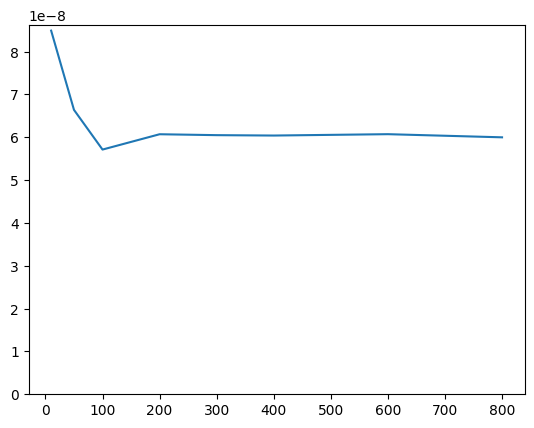

In [65]:
measures = [] #For each of this input size well create a new list with random input and time how fast our function here is
for n in list_of_n:
    items = [int(random.random()*n) for _ in range(n)]
    time = %timeit -o get_first_item(items)
    measures.append((n, time.average))
plt.plot(*zip(*measures))
plt.ylim(ymin=0)
plt.show()

## Linear

429 ns ± 14.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.31 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
2.24 µs ± 8.56 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
4.39 µs ± 144 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
6.67 µs ± 156 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
8.84 µs ± 145 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
12.9 µs ± 131 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.2 µs ± 272 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


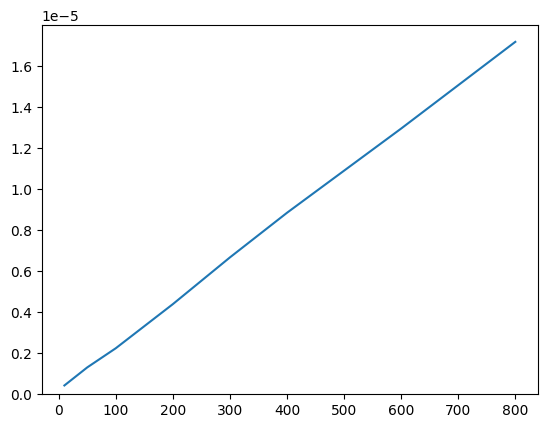

In [66]:
measures = [] # Measure how long it takes to get the maximum of the list
for n in list_of_n:
    items = [int(random.random()*n) for _ in range(n)]
    time = %timeit -o find_max(items)
    measures.append((n, time.average))
plt.plot(*zip(*measures))
plt.ylim(ymin=0)
plt.show()

869 ns ± 8.45 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
2.76 µs ± 490 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.04 µs ± 75.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
7.62 µs ± 340 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
11.2 µs ± 79 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
14.8 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
22.6 µs ± 679 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
29.2 µs ± 509 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


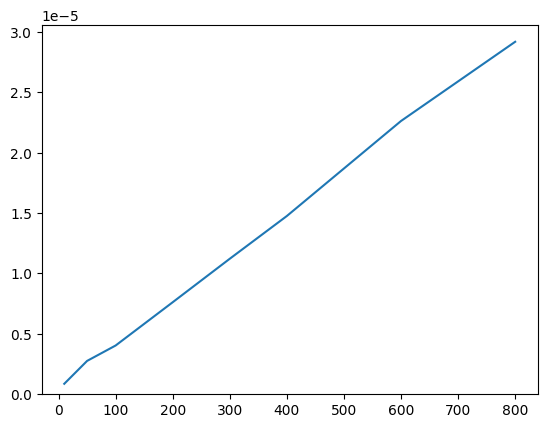

In [68]:
measures = []
for n in list_of_n:
    items = [int(random.random()*n) for _ in range(n)]
    time = %timeit -o find_minmax1(items)
    measures.append((n, time.average))
plt.plot(*zip(*measures))
plt.ylim(ymin=0)
plt.show()

682 ns ± 7.49 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
2.32 µs ± 40.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.13 µs ± 368 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.91 µs ± 152 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
8.06 µs ± 240 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
10.9 µs ± 272 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
16.1 µs ± 150 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
21.8 µs ± 813 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


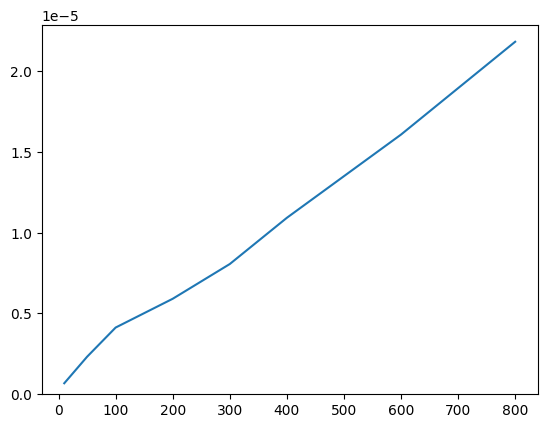

In [69]:
measures = []
for n in list_of_n:
    items = [int(random.random()*n) for _ in range(n)]
    time = %timeit -o find_minmax2(items)
    measures.append((n, time.average))
plt.plot(*zip(*measures))
plt.ylim(ymin=0)
plt.show()

## Quadratic

9.41 µs ± 314 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
227 µs ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
726 µs ± 50.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.01 ms ± 99.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.99 ms ± 68.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.3 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
37.8 ms ± 2.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
71.1 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


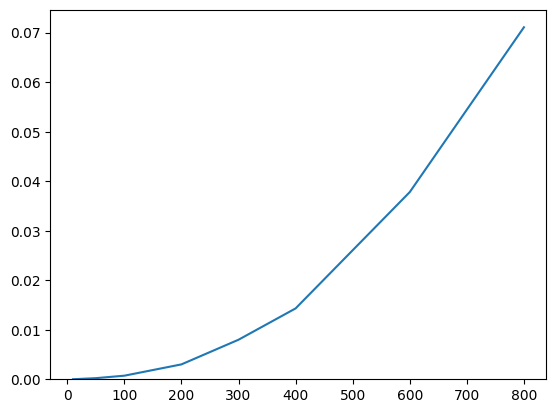

In [70]:
measures = []
for n in list_of_n:
    items = [int(random.random()*n) for _ in range(n)]
    time = %timeit -o all_combinations(items)
    measures.append((n, time.average))
plt.plot(*zip(*measures))
plt.ylim(ymin=0)
plt.show()